Create and compare two models. One of these must be a Bayes classifier, the other I chose logistic regression.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
%matplotlib inline

In [3]:
pd1 = pd.read_csv('./clean_comments.csv')

In [4]:
pd1.head()

,comment,target
0,think able handle really well known vr game be...,0
1,game tried vr point fix,0
2,sde still exists waaaaaaaay le pentile screen ...,0
3,bought rift used never spent dime game market ...,0
4,nothing real life bother thing made vr time st...,0


In [5]:
pd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15906 entries, 0 to 15905
Data columns (total 2 columns):
comment    15906 non-null object
target     15906 non-null int64
dtypes: int64(1), object(1)
memory usage: 248.6+ KB


In [6]:
pd1.isnull().sum()

comment    0
target     0
dtype: int64

In [7]:
pd1.dtypes

comment    object
target      int64
dtype: object

#### Train Test Split

In [8]:
#Define Feature Matrix and Target Vector.

y = pd1['target']
X = pd1['comment']

In [9]:
y.value_counts(normalize=True)

0    0.617566
1    0.382434
Name: target, dtype: float64

In [10]:
#Create train,test,split.
#As oculus and vive classes are imbalanced, I stratified y.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

#### Tfidf Vectorizer

In [11]:
#1000 features, no stop words, ngram range default as 1.
#This shall be the vectorizer for my baseline logistic regression model.
tvec_b = TfidfVectorizer(max_features = 1000, stop_words = None)

In [12]:
#Fitting and transforming train and test data.

train_features_b = tvec_b.fit_transform(X_train)

test_features_b = tvec_b.transform(X_test)

# Convert the result to an array.
train_features_b = train_features_b.toarray()

In [13]:
print(train_features_b.shape)

(11929, 1000)


In [14]:
print(test_features_b.shape)

(3977, 1000)


In [15]:
vocab_b = tvec_b.get_feature_names()
print(vocab_b)

['aaa', 'ability', 'able', 'absolutely', 'access', 'account', 'action', 'active', 'actual', 'actually', 'adapter', 'add', 'added', 'adjustment', 'advantage', 'afford', 'ago', 'agree', 'ah', 'ai', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'alyx', 'amazing', 'amazon', 'amd', 'amount', 'announced', 'announcement', 'another', 'answer', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'app', 'appear', 'application', 'apps', 'area', 'argument', 'arm', 'around', 'article', 'asgard', 'ask', 'asking', 'assume', 'audio', 'automatically', 'available', 'aware', 'away', 'awesome', 'back', 'bad', 'barely', 'base', 'based', 'basic', 'basically', 'battery', 'beat', 'beatsaber', 'become', 'behind', 'believe', 'benefit', 'best', 'beta', 'better', 'big', 'bigger', 'biggest', 'bit', 'black', 'blade', 'body', 'boneworks', 'bot', 'bought', 'box', 'brand', 'break', 'bring', 'buck', 'budget', 'bug', 'build', 'building', 'built', 'bunch', 'business', 'button'

#### Baseline Logistic Regression

In [16]:
# Instantiate a Logistic regression model.
lr_b = LogisticRegression()

In [17]:
# Fit the model.
lr_b.fit(train_features_b,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# Evaluate model on training data.
lr_b.score(train_features_b, y_train)

0.7505239332718585

In [19]:
# Evaluate model on testing data.

lr_b.score(test_features_b, y_test)

0.708825748051295

This is the baseline logistic regression score which will be used to compare against a logistic regression model (with stop_words and bigram included) and Bayes Classifer.

#### Tfidf Vectorizer

In [19]:
tvec = TfidfVectorizer(max_features = 3000, stop_words = 'english', ngram_range=(1, 2))

In [20]:
#Fitting and transforming train and test data.

train_features = tvec.fit_transform(X_train)

test_features = tvec.transform(X_test)

# Convert the result to an array.
train_features = train_features.toarray()

In [21]:
print(train_features.shape)

(11929, 3000)


In [22]:
print(test_features.shape)

(3977, 3000)


In [23]:
vocab = tvec.get_feature_names()
print(vocab)

['aa', 'aa carmack', 'aaa', 'aaa game', 'aaa title', 'aaa vr', 'aautomoderator', 'aautomoderator sort', 'ability', 'able', 'able play', 'able use', 'abrash', 'absolute', 'absolutely', 'acceptable', 'access', 'accessible', 'accessory', 'accident', 'according', 'account', 'account create', 'accuracy', 'accurate', 'achieve', 'achievement', 'act', 'action', 'action performed', 'active', 'actual', 'actually', 'ad', 'adapter', 'adaptor', 'add', 'added', 'adding', 'addition', 'additional', 'adjust', 'adjustable', 'adjustment', 'admit', 'adoption', 'adult', 'advance', 'advanced', 'advancement', 'advantage', 'adventure', 'advice', 'afaik', 'affect', 'afford', 'affordable', 'afraid', 'age', 'agi', 'ago', 'agree', 'agreed', 'ah', 'ahead', 'ai', 'aim', 'aiming', 'air', 'alien', 'alien isolation', 'allow', 'allowed', 'allowing', 'allows', 'alot', 'alright', 'alternate', 'alternative', 'alvr', 'alyx', 'amazing', 'amazon', 'amazon com', 'amd', 'amd ryzen', 'american', 'android', 'angle', 'anker', 'an

#### Logistic Regression

In [24]:
# Instantiate a Logistic regression model.
lr = LogisticRegression()

In [25]:
# Fit the model.
lr.fit(train_features,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
# Evaluate model on training data.
lr.score(train_features, y_train)

0.7809539777014

In [27]:
# Evaluate model on testing data.

lr.score(test_features, y_test)

0.7239124968569274

Since my model has a slightly higher accuracy on the training set and on the testing set, my model is slightly overfitting. I could reduce the number of features to reduce the overfitting or perform regularization. 


#### Grid Search Regularization with Logistic Regression

In [28]:
# Set up the parameters. Looking at C regularization strengths on a log scale.
gs_params = {
    'penalty':['l1','l2'],
    'solver':['saga'],
    'C':np.logspace(-1,1,10)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=3, verbose=2, n_jobs=-1)

In [29]:
#%%time
lr_gridsearch = lr_gridsearch.fit(train_features, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.6min finished


In [30]:
# best score on the training data:
lr_gridsearch.best_score_

0.7159862519909465

In [31]:
# best parameters on the training data:
lr_gridsearch.best_params_

{'C': 1.291549665014884, 'penalty': 'l1', 'solver': 'saga'}

In [32]:
# assign the best estimator to a variable:
best_lr = lr_gridsearch.best_estimator_

In [33]:
# Score it on the testing data:
best_lr.score(test_features, y_test)

0.7276841840583355

#### Classification Metrics

In [34]:
#Recall: oculus is coded as 0 and vive is coded as 1
#positive is vive, negative is oculus

In [35]:
# Import confusion matrix.
from sklearn.metrics import confusion_matrix

In [36]:
# Generate predictions.
preds = best_lr.predict(test_features)

In [37]:
#Generate confusion matrix.
confusion_matrix(y_test, # True values.
                 preds)  # Predicted values.

array([[2190,  266],
       [ 817,  704]], dtype=int64)

In [38]:
# Save TN/FP/FN/TP values.

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [39]:
# Specificity of test set.

spec = tn/(tn+fp)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.8917


Out of 100 cases where the subreddit is actually Oculus, the model is correctly predicting 89.2 of the comments to be from Oculus.

In [40]:
# Sensitivity of test set.

sens = tp/(tp+fn)

print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.4629


Out of 100 cases where the subreddit is actually Vive, the model is correctly predicting 46.3 of the comments to be from Vive.

In [41]:
#Precision

prec = tp/(tp+fp)
print(f'Precision: {round(prec,4)}')

Precision: 0.7258


Out of 100 Vive predictions, we are correctly predicting 72.3 comments from Vive.

In [42]:
#Accuracy

acc = (tp+tn)/(tp+fp+tn+fn)
print(f'Accuracy: {round(acc,4)}')

Accuracy: 0.7277


Out of 100 predictions, we are correctly predicting 72.8 of them.

In [43]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on the model.

pred_proba = [i[1] for i in lr.predict_proba(test_features)] 
#only pick up predictions for the class '1' by calling i[1]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [44]:
pred_df.head() #probability of y=1

,true_values,pred_probs
11213,1,0.976178
3729,0,0.161153
15455,1,0.500523
13639,1,0.499562
6668,0,0.161969


Text(0.5,0,'Predicted Probability that Outcome = 1')

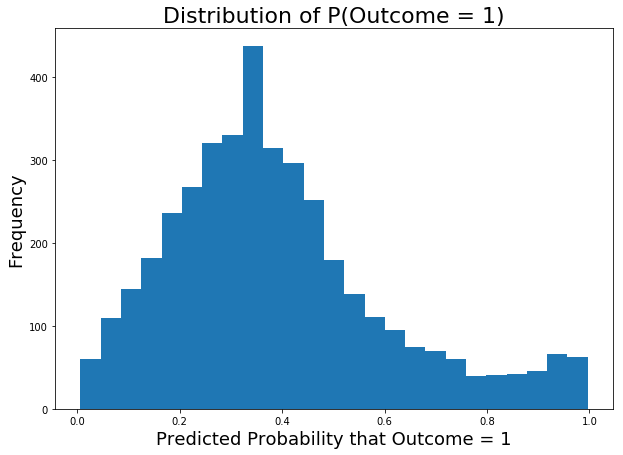

In [45]:
#Histogram

# Create figure.
plt.figure(figsize = (10,7))

# Create histogram of observations.
plt.hist(pred_df['pred_probs'], bins=25)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

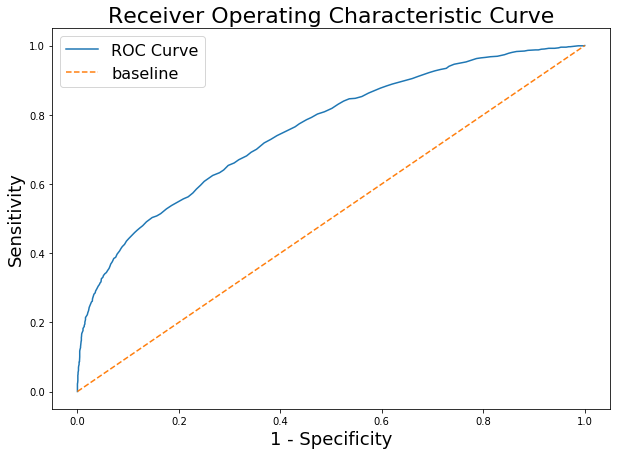

In [46]:
#ROC

# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

In [47]:
# Import roc_auc_score.
from sklearn.metrics import roc_auc_score

In [48]:
# Calculate score.
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.756345340049299

ROC score is 0.756, which is pretty close to 1. The closer my ROC AUC is to 1, the better because this would mean my positive and negative populations are more separated and hence my model is good.

#### Tfidf Vectorizer

In [49]:
tvec_2 = TfidfVectorizer(max_features = 3000, stop_words = 'english', ngram_range=(1, 2))

In [50]:
#Fitting and transforming train and test data.

train_features_2 = tvec_2.fit_transform(X_train)

test_features_2 = tvec_2.transform(X_test)

# Convert the result to an array.
train_features_2 = train_features_2.toarray()

In [51]:
print(train_features_2.shape)

(11929, 3000)


In [52]:
print(test_features_2.shape)

(3977, 3000)


In [53]:
vocab_2 = tvec_2.get_feature_names()
print(vocab_2)

['aa', 'aa carmack', 'aaa', 'aaa game', 'aaa title', 'aaa vr', 'aautomoderator', 'aautomoderator sort', 'ability', 'able', 'able play', 'able use', 'abrash', 'absolute', 'absolutely', 'acceptable', 'access', 'accessible', 'accessory', 'accident', 'according', 'account', 'account create', 'accuracy', 'accurate', 'achieve', 'achievement', 'act', 'action', 'action performed', 'active', 'actual', 'actually', 'ad', 'adapter', 'adaptor', 'add', 'added', 'adding', 'addition', 'additional', 'adjust', 'adjustable', 'adjustment', 'admit', 'adoption', 'adult', 'advance', 'advanced', 'advancement', 'advantage', 'adventure', 'advice', 'afaik', 'affect', 'afford', 'affordable', 'afraid', 'age', 'agi', 'ago', 'agree', 'agreed', 'ah', 'ahead', 'ai', 'aim', 'aiming', 'air', 'alien', 'alien isolation', 'allow', 'allowed', 'allowing', 'allows', 'alot', 'alright', 'alternate', 'alternative', 'alvr', 'alyx', 'amazing', 'amazon', 'amazon com', 'amd', 'amd ryzen', 'american', 'android', 'angle', 'anker', 'an

#### Bayes classifier

In [54]:
# Instantiate model.

nb = MultinomialNB()

In [55]:
# Fit model.

model = nb.fit(train_features_2, y_train)

In [56]:
# Generate predictions.

predictions = model.predict(test_features_2)

In [57]:
# Score model on the training set.

model.score(train_features_2, y_train)

0.754380082152737

In [58]:
# Score model on the testing set.

model.score(test_features_2, y_test)

0.712597435252703

#### Classification Metrics

In [59]:
# Generate a confusion matrix.

confusion_matrix(y_test,predictions)

array([[2289,  167],
       [ 976,  545]], dtype=int64)

In [60]:
# Save TN/FP/FN/TP values.

tn_nb, fp_nb, fn_nb, tp_nb = confusion_matrix(y_test, predictions).ravel()

In [61]:
# Specificity of test set.

spec_nb = tn_nb/(tn_nb+fp_nb)

print(f'Specificity: {round(spec_nb,4)}')

Specificity: 0.932


Out of 100 cases where the subreddit is actually Oculus, the model is correctly predicting 84.9 of the comments to be from Oculus.

In [62]:
# Sensitivity of test set.

sens_nb = tp_nb/(tp_nb+fn_nb)

print(f'Sensitivity: {round(sens_nb,4)}')

Sensitivity: 0.3583


Out of 100 cases where the subreddit is actually Vive, the model is correctly predicting 49.8 of the comments to be from Vive.

In [63]:
#Precision

prec_nb = tp_nb/(tp_nb+fp_nb)
print(f'Precision: {round(prec_nb,4)}')

Precision: 0.7654


Out of 100 Vive predictions, we are correctly predicting 67.2 comments from Vive.

In [64]:
#Accuracy

acc_nb = (tp_nb+tn_nb)/(tp_nb+fp_nb+tn_nb+fn_nb)
print(f'Accuracy: {round(acc_nb,4)}')

Accuracy: 0.7126


Out of 100 predictions, we are correctly predicting 71.5 of them.

In [66]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on the model.

pred_proba_nb = [i[1] for i in nb.predict_proba(test_features_2)] 
#only pick up predictions for the class '1' by calling i[1]

pred_df_nb = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba_nb})

In [67]:
pred_df_nb.head() #probability of y=1

,true_values,pred_probs
11213,1,0.906922
3729,0,0.233490
15455,1,0.502375
13639,1,0.517751
6668,0,0.117198


Text(0.5,0,'Predicted Probability that Outcome = 1')

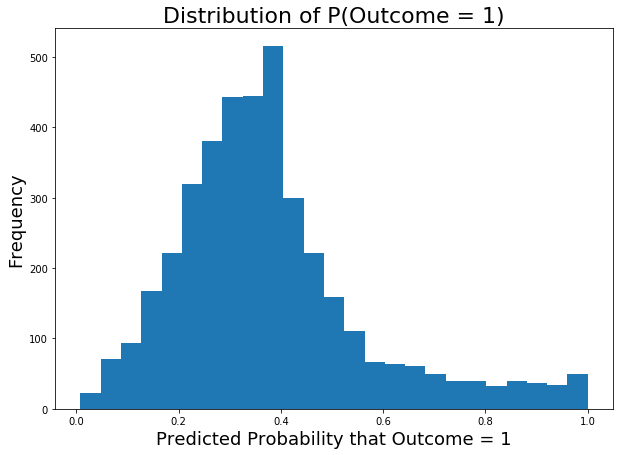

In [68]:
#Histogram

# Create figure.
plt.figure(figsize = (10,7))

# Create histogram of observations.
plt.hist(pred_df_nb['pred_probs'], bins=25)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

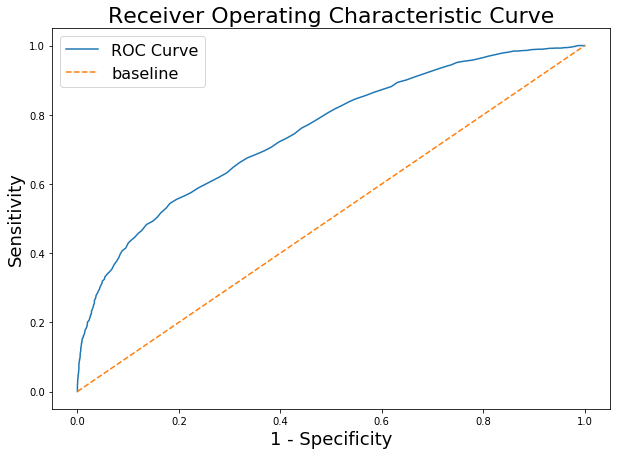

In [69]:
#ROC

# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df_nb, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df_nb, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

In [70]:
# Calculate roc_auc score.
roc_auc_score(pred_df_nb['true_values'], pred_df_nb['pred_probs'])

0.7504629808093852

ROC score is 0.750, which is pretty close to 1. The closer my ROC AUC is to 1, the better because this would mean my positive and negative populations are more separated and hence my model is good.

In Conclusion, TfidfVectorizer was used to convert the text to numeric features. 
TfidfVectorizer achieved a better accuracy score for the logistic regression model than the Multinomial Bayes Classifier and baseline logistic regression model. Hence, I adopted the logistic regression model as my Classifer for predictions.

In [71]:
# Generate and print predicted probabilities with the Logistic Regression Model.
print(f'Logreg predicted probabilities: {best_lr.predict_proba(test_features)}')

Logreg predicted probabilities: [[0.00458013 0.99541987]
 [0.89208971 0.10791029]
 [0.57283429 0.42716571]
 ...
 [0.64010262 0.35989738]
 [0.62881312 0.37118688]
 [0.67010331 0.32989669]]


In [72]:
# Generate and print predicted values.
print(f'Logreg predicted values: best_lr.{best_lr.predict(test_features)}')

Logreg predicted values: best_lr.[1 0 0 ... 0 0 0]
